In [1]:
import pandas as pd
import numpy as np
import io
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\user\Desktop\repos\igem-model\data\final.csv")
df = df.drop(df[df["population"].isna()].index)
X = df.drop(columns=["infection"])
X["density"] = X["population"]/X["area"]
y = df["infection"].astype("float64")
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )


0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
10089     0.0
10090     4.0
10091     4.0
10092    33.0
10093    45.0
Name: infection, Length: 9878, dtype: float64

In [3]:
X.describe()

,year,month,forest cover,population,area,oro_temp,juntamoji_temp,debesuotumas,slegis_juros_lyg,santyk_oro_dregme,kritutliu_kiekis,krituliu_kiekis,density
count,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9873.000000,3270.000000,3250.000000,3270.000000,3270.000000,3270.000000,9878.000000,9878.000000
mean,2010.596578,6.537862,32.660215,97552.837821,2034.189006,7.481953,7.205333,58.527727,1015.462579,79.014977,56.541713,59.067868,201.067636
std,4.080929,3.436450,12.775788,149172.223939,2186.840810,8.064877,8.735728,19.402729,3.650333,7.760224,34.052082,36.071205,501.616665
min,2004.000000,1.000000,0.600000,2564.000000,39.000000,-12.038710,-12.197043,0.000000,1006.318548,58.009409,2.000000,2.000000,10.054152
25%,2007.000000,4.000000,26.000000,27689.000000,1033.000000,0.996774,0.448452,47.913674,1012.427361,73.330645,31.200000,34.200000,21.441567
50%,2011.000000,7.000000,32.300000,40270.000000,1395.000000,7.406452,7.437231,58.105263,1015.476210,78.575000,53.200000,52.100000,30.167561
75%,2014.000000,10.000000,36.600000,93422.000000,1764.000000,14.580000,15.013472,74.896978,1017.794758,85.468750,74.100000,76.000000,44.746295
max,2018.000000,12.000000,83.000000,841748.000000,9730.000000,22.158065,21.703898,94.550000,1024.725556,95.904441,277.000000,286.000000,2318.165605


In [4]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor())
]
pipe = Pipeline(steps=estimators)
pipe

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,None
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(7,15),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0),
    'clf__n_estimators': Integer(1000, 2000)
}
score = "neg_mean_squared_error"
#score = "r2"
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring=score, ) 

In [6]:
opt.fit(X_train, y_train)
model = opt.best_estimator_.named_steps['clf']

In [8]:

print(opt.score(X_train,y_train), opt.score(X_test, y_test))   
opt

-2.995213863718125 -16.78485338953664


,estimator,"Pipeline(step...=None, ...))])"
,search_spaces,"{'clf__colsample_bylevel': Real(low=0.5,...m='normalize'), 'clf__colsample_bynode': Real(low=0.5,...m='normalize'), 'clf__colsample_bytree': Real(low=0.5,...m='normalize'), 'clf__gamma': Real(low=0.0,...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,10
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


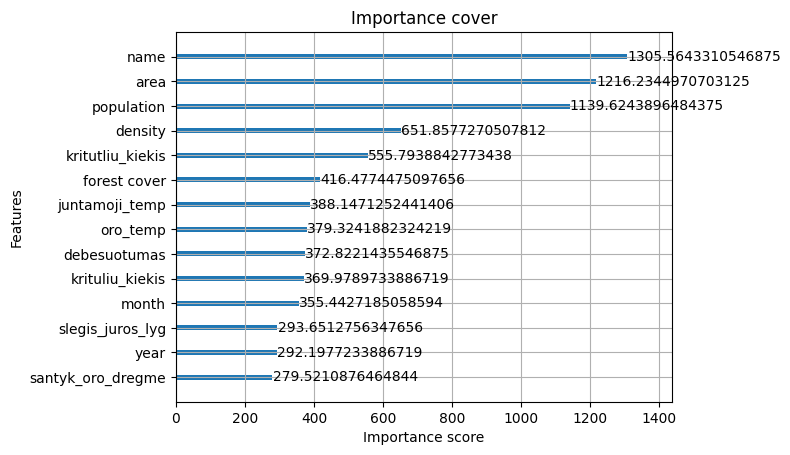

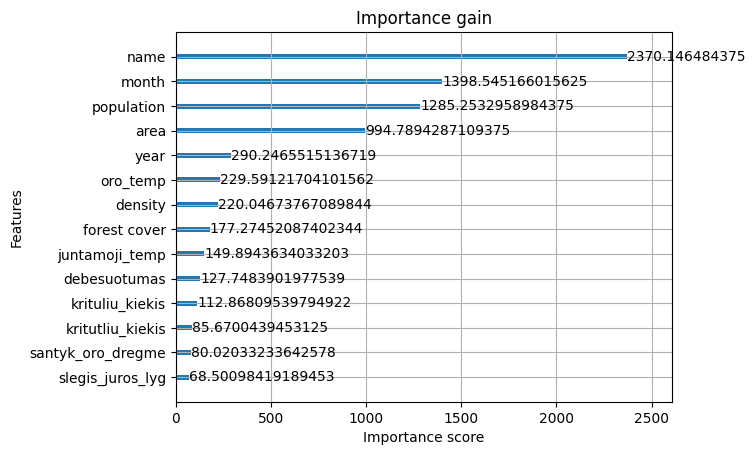

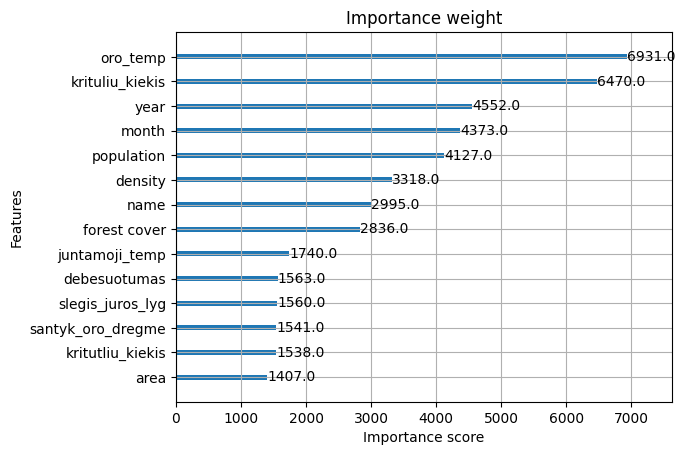

In [10]:
import matplotlib.pyplot as plt
for way in ["cover", "gain", "weight"]: 
    xgb.plot_importance(model, importance_type=way, height=0.2)
    plt.title(f'Importance {way}')
    plt.show()

In [ ]:
def relu(x):
    if x > 0: return x
    else: 
        return 0
print(y_test)
y_pred_test = opt.predict(X_test)
zeros = 0
for i in range(len(y_pred_test)):
    if y_pred_test[i] < 0: zeros += 1
    y_pred_test[i] = relu(y_pred_test[i])
print(f"{zeros} less than zeros")
s = 0
for i in range(len(y_pred_test)):
    s += (y_pred_test[i] - np.array(y_test)[i])**2
print(s/len(y_test))

7100     0.0
1260     2.0
2769     0.0
7142     5.0
5240     0.0
        ... 
5355     0.0
7938     3.0
2438    32.0
7085     1.0
5294     0.0
Name: infection, Length: 1976, dtype: float64
16 less than zeros
17.416862797815682


In [ ]:
def smape(y_true, y_pred):
    """Symmetric MAPE - handles zeros better"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

def safe_mape(y_true, y_pred, epsilon=1e-8):
    """MAPE that handles zero values"""
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Or exclude zeros entirely
def mape_no_zeros(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100



def MSE(y_true,y_pred):
    return np.mean(np.power(y_true-y_pred,2))
